# MEIA - TEAM 6
# Pre-Modeling: Data Preprocessing and Feature Exploration in Python
Original Dataset: https://www.oecd.org/pisa/data/2018database/



## Goal: Pre-modeling/modeling 

The dataset used was made available by the  Organisation for Economic Co-operation and Development (OECD) under the Programme for International Student Assessment (PISA). "PISA is the OECD's Program for International Student Assessment. PISA measures 15-year-olds' ability to use their reading, mathematics and science knowledge and skills to meet real-life challenges"(OECD, 2022). The dataset has an enormous complexity, consisting of 1118 columns and more than 600.000 lines, containing data from 79 countries. From this 79 countries, 41 are not OCDE members.

Before starting the treatment using Python, the dataset was analyzed bearing in mind the objectives of the present work, and, in this first phase, only the data related to Portugal was considered. Given the high number of columns that represents the features to be considered, a study was made in order to exclude those columns that are not relevant. To accomplish this, the technical specifications provided by the OECD were consulted, as well as the codebook, both available at https://www.oecd.org/pisa/. 

The criteria that was used to eliminate the columns follow the strategy:
- Columns with equal value for all students
- Columns with no values
- Columns whose data is not relevant to our problem

A closer analysis of the dataset showed that it was composed of two parts. The first part includes all the responses to the various questionnaires that are part of PISA and the second part includes indicators resulting from a treatment made by the OECD experts. These indicators result from a previous treatment of the raw data collected through the questionnaires. They have, at the outset, the particularity of being relative values, situated around the average of all PISA values. Consider the following example, concerning the Adaptive instruction indicator (ADAPTIVITY) that was constructed using students’ responses to a specific question. "Positive values on this scale mean that students perceived their language-of-instruction teachers to be more adaptive than did the average student across OECD countries." (OCDE, 2022). In this way, it was possible to exclude the answers to each of the questions from the extensive questionnaires and keep the indicators that represent them.

At the end of this process, the dataset has 45 columns and 5933 rows.

    

### Step 1 - Importing the dataset

In [51]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) # print all columns

df = pd.read_csv('PISA.csv',na_values=['#NAME?'],sep=';')

print (df.head(10))


   STRATUM  ISCEDO MISCED FISCED  IMMIG  DURECEC  REPEAT     ESCS UNDREM  \
0  PRT0007       1     99     99      9       99       9                   
1  PRT0007       1     99     99      9       99       9                   
2  PRT0007       1      6      6      1        2       1   -,0355  -1,64   
3  PRT0007       1      2      2      1       99       1  -1,4516  -1,64   
4  PRT0007       1      0      0      1        7       1  -2,7528    -,6   
5  PRT0007       1     99      1      1        3       1  -2,9658     ,1   
6  PRT0007       1     99     99      9       99       9                   
7  PRT0007       1      2      5      1       99       1  -2,2048   -,25   
8  PRT0007       1      5      5      1       99       1  -2,0728   -,94   
9  PRT0007       1      2      1      1       99       1  -2,7422  -1,64   

  METASUM  HOMEPOS CULTPOSS   HEDRES   WEALTH   ICTRES  DIRINS  PERFEED  \
0               99       99       99       99       99      99       99   
1            

### Step 2 - Data formating

#### 2.1- Empty values

In the dataset there are some empty values (" ").
First must be removed the leading and trailing characters using "strip".
After these values sould be replaced with a special value - 666666

In [52]:

df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

df.replace("","666666", inplace=True)
print (df.head(10))

   STRATUM  ISCEDO MISCED FISCED  IMMIG  DURECEC  REPEAT     ESCS  UNDREM  \
0  PRT0007       1     99     99      9       99       9   666666  666666   
1  PRT0007       1     99     99      9       99       9   666666  666666   
2  PRT0007       1      6      6      1        2       1   -,0355   -1,64   
3  PRT0007       1      2      2      1       99       1  -1,4516   -1,64   
4  PRT0007       1      0      0      1        7       1  -2,7528     -,6   
5  PRT0007       1     99      1      1        3       1  -2,9658      ,1   
6  PRT0007       1     99     99      9       99       9   666666  666666   
7  PRT0007       1      2      5      1       99       1  -2,2048    -,25   
8  PRT0007       1      5      5      1       99       1  -2,0728    -,94   
9  PRT0007       1      2      1      1       99       1  -2,7422   -1,64   

  METASUM  HOMEPOS CULTPOSS   HEDRES   WEALTH   ICTRES  DIRINS  PERFEED  \
0  666666       99       99       99       99       99      99       99   
1 

#### 2.1- Checking data types

In [28]:
print (df.dtypes)

STRATUM         object
ISCEDO           int64
MISCED          object
FISCED          object
IMMIG            int64
DURECEC          int64
REPEAT           int64
ESCS            object
UNDREM          object
METASUM         object
HOMEPOS         object
CULTPOSS        object
HEDRES          object
WEALTH          object
ICTRES          object
DIRINS          object
PERFEED         object
EMOSUPS         object
TEACHINT        object
JOYREAD         object
ATTLNACT        object
COMPETE         object
WORKMAST        object
GFOFAIL         object
EUDMO           object
SWBP            object
RESILIENCE      object
GCSELFEFF       object
DISCRIM         object
BELONG          object
BEINGBULLIED    object
CURSUPP         object
EMOSUPP         object
JOYREADP        object
PV1MATH         object
PV1SCIE         object
dtype: object


The object types should be converted to numbers.
A special attention should be given to the column "STRATUM", since is the only one that have a non numerical values. In this case, "PTR" can be removed without any loss.

In [53]:




df['STRATUM'].replace(r'[a-zA-Z%]', '', regex=True, inplace=True)

for i in range(0,36):
    if (df[df.columns[i]].dtypes=='object'):
        df[df.columns[i]] = df[df.columns[i]].str.replace('-,','-0,',n=3)
        df[df.columns[i]] = df[df.columns[i]].str.replace(',','.',n=1)
        df[df.columns[i]] = pd.to_numeric(df[df.columns[i]])

print (df.head(10))

   STRATUM  ISCEDO  MISCED  FISCED  IMMIG  DURECEC  REPEAT         ESCS  \
0        7       1      99      99      9       99       9  666666.0000   
1        7       1      99      99      9       99       9  666666.0000   
2        7       1       6       6      1        2       1      -0.0355   
3        7       1       2       2      1       99       1      -1.4516   
4        7       1       0       0      1        7       1      -2.7528   
5        7       1      99       1      1        3       1      -2.9658   
6        7       1      99      99      9       99       9  666666.0000   
7        7       1       2       5      1       99       1      -2.2048   
8        7       1       5       5      1       99       1      -2.0728   
9        7       1       2       1      1       99       1      -2.7422   

      UNDREM    METASUM  HOMEPOS  CULTPOSS   HEDRES   WEALTH   ICTRES  \
0  666666.00  666666.00  99.0000   99.0000  99.0000  99.0000  99.0000   
1  666666.00  666666.00  99.

In [47]:
print (df.dtypes)

STRATUM           int64
ISCEDO            int64
MISCED            int64
FISCED            int64
IMMIG             int64
DURECEC           int64
REPEAT            int64
ESCS            float64
UNDREM          float64
METASUM         float64
HOMEPOS         float64
CULTPOSS        float64
HEDRES          float64
WEALTH          float64
ICTRES          float64
DIRINS          float64
PERFEED         float64
EMOSUPS         float64
TEACHINT        float64
JOYREAD         float64
ATTLNACT        float64
COMPETE         float64
WORKMAST        float64
GFOFAIL         float64
EUDMO           float64
SWBP            float64
RESILIENCE      float64
GCSELFEFF       float64
DISCRIM         float64
BELONG          float64
BEINGBULLIED    float64
CURSUPP         float64
EMOSUPP         float64
JOYREADP        float64
PV1MATH         float64
PV1SCIE         float64
dtype: object


#### 2.1-Handling missing data

In [31]:
##### 2.2 - Empty  values in indicators
"""
.V/95	Valid Skip
.N/97	Not Applicable
.I/98	Invalid
.M/99	No Response
"""


'\n.V/95\tValid Skip\n.N/97\tNot Applicable\n.I/98\tInvalid\n.M/99\tNo Response\n'

In [54]:
# Estratégia 1 - remover TODAS as linhas com valores nulos/inválidos
for i in range(0,36):
    """ind = df[ (df[df.columns[i]] == 99)].index
    df.drop(ind, inplace=True)
    ind = df[ (df[df.columns[i]] == 999999)].index
    df.drop(ind, inplace=True)
    ind = df[ (df[df.columns[i]] == 666666)].index
    df.drop(ind, inplace=True)"""
    ind = df[ (df['REPEAT'] == 99)].index
    df.drop(ind, inplace=True)
"""    
#Estratégia 2 - Colocar valores médios
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=666666.0000, strategy='mean')
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df) , columns=df.columns)
imp = SimpleImputer(missing_values=99.0000, strategy='mean')
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df) , columns=df.columns)"""

#Estratégia 3 - mista, tendo a natureza dos dados

print(len(df.index))       

5932


In [55]:
print (df.head(10))


   STRATUM  ISCEDO  MISCED  FISCED  IMMIG  DURECEC  REPEAT         ESCS  \
0        7       1      99      99      9       99       9  666666.0000   
1        7       1      99      99      9       99       9  666666.0000   
2        7       1       6       6      1        2       1      -0.0355   
3        7       1       2       2      1       99       1      -1.4516   
4        7       1       0       0      1        7       1      -2.7528   
5        7       1      99       1      1        3       1      -2.9658   
6        7       1      99      99      9       99       9  666666.0000   
7        7       1       2       5      1       99       1      -2.2048   
8        7       1       5       5      1       99       1      -2.0728   
9        7       1       2       1      1       99       1      -2.7422   

      UNDREM    METASUM  HOMEPOS  CULTPOSS   HEDRES   WEALTH   ICTRES  \
0  666666.00  666666.00  99.0000   99.0000  99.0000  99.0000  99.0000   
1  666666.00  666666.00  99.

In [56]:
print(len(df.index)) 

5932


In [57]:
# Use dummies for regions 

dummies = pd.get_dummies(df['STRATUM'], prefix='STRATUM', dummy_na=False)
df = df.drop('STRATUM',1) 
df = pd.concat([df,dummies], axis=1)


C:\Users\emgsi\AppData\Local\Temp\ipykernel_16936\3449872216.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('STRATUM',1)


In [58]:
print (df.head(10))

   ISCEDO  MISCED  FISCED  IMMIG  DURECEC  REPEAT         ESCS     UNDREM  \
0       1      99      99      9       99       9  666666.0000  666666.00   
1       1      99      99      9       99       9  666666.0000  666666.00   
2       1       6       6      1        2       1      -0.0355      -1.64   
3       1       2       2      1       99       1      -1.4516      -1.64   
4       1       0       0      1        7       1      -2.7528      -0.60   
5       1      99       1      1        3       1      -2.9658       0.10   
6       1      99      99      9       99       9  666666.0000  666666.00   
7       1       2       5      1       99       1      -2.2048      -0.25   
8       1       5       5      1       99       1      -2.0728      -0.94   
9       1       2       1      1       99       1      -2.7422      -1.64   

     METASUM  HOMEPOS  CULTPOSS   HEDRES   WEALTH   ICTRES   DIRINS  PERFEED  \
0  666666.00  99.0000   99.0000  99.0000  99.0000  99.0000  99.0000  99.

Values: [226.665, 216.93, 153.454, 164.08, 778.664, 214.752, 204.982, 199.405, 183.931, 193.567, 220.858]
Indices: [1745, 2037, 2496, 3586, 3675, 3719, 3953, 4673, 4700, 4905, 5683]
[153.454 164.08  183.931 193.567 199.405 204.982 214.752 216.93  220.858
 226.665 778.664]


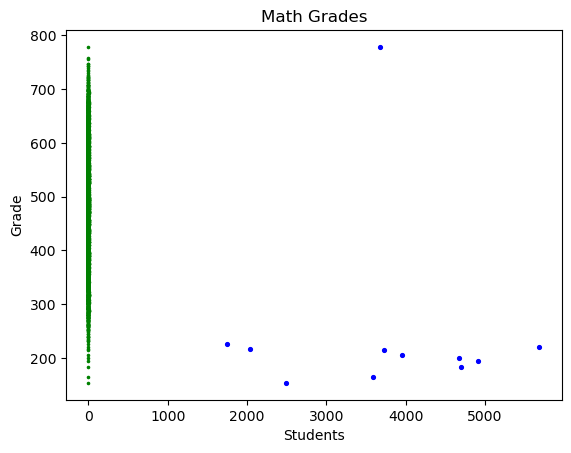

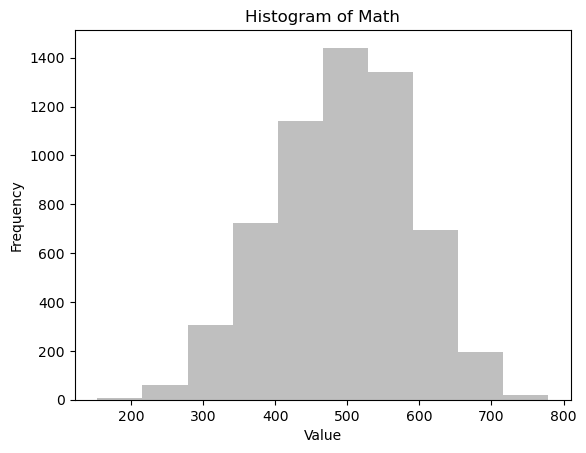

In [59]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values


tukey_indices, tukey_values = find_outliers_tukey(df['PV1MATH'])
print ("Values:",tukey_values)
print ("Indices:",tukey_indices)
print(np.sort(tukey_values))


%matplotlib inline
import matplotlib.pyplot as plt


plt.scatter(df['STRATUM_1'], df['PV1MATH'],  label="rrr", color= "green", marker= ".",s=10)
#plt.scatter(df['CNTSTUID'], df['RESILIENCE'],  label="rrr", color= "green", marker= ".",s=10)
plt.title("Math Grades")
plt.xlabel("Students")
plt.ylabel("Grade")
plt.scatter(tukey_indices, tukey_values, label="rrr", color= "blue", marker= ".",s=30)
#plt.scatter(df['STRATUM_1'], df['PV1SCIE'], color= "blue",  marker= ".",s=10)

  
plt.show() 

    


def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of Math")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
plot_histogram(df['PV1MATH'])


In [28]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]

    return outlier_ind, outlier_value
kde_indices, kde_values = find_outliers_kde(df['PV1MATH'])
print(np.sort(kde_values))

[153.454 164.08  183.931 193.567 199.405 204.982 214.752 216.93  220.858
 226.665 231.248 232.043 233.282 235.681 238.237 238.619 238.973 241.509
 243.605 245.366 248.332 249.662 251.242 252.057 252.483 253.808 254.061
 256.922 257.66  257.847 259.246 259.892 259.964 260.567 261.052 261.428
 261.666 261.855 263.534 263.552 263.818 265.347 266.247 267.557 267.75
 268.451 268.626 269.574 270.35  270.953 270.97  271.052 271.109 272.73
 273.575 274.116 274.304 274.468 274.478 274.599 274.655 275.266 275.48
 276.223 276.351 276.362 277.381 278.271 278.392 279.22  279.297 279.589
 279.675 279.676 279.728 279.8   280.327 280.767 280.925 281.206 281.703
 281.903 283.258 283.458 283.582 283.628 283.742 284.047 686.115 686.432
 686.961 687.17  687.188 687.338 687.446 687.663 687.875 689.284 690.063
 690.201 690.262 690.493 690.868 691.539 692.16  692.2   692.335 692.491
 694.538 696.243 696.317 696.949 697.072 697.313 697.785 698.819 698.923
 698.96  699.055 699.135 699.835 700.291 701.279 703.1

In [60]:
# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

df = add_interactions(df)
print(df.head(5))

   ISCEDO  MISCED  FISCED  IMMIG  DURECEC  REPEAT         ESCS     UNDREM  \
0     1.0    99.0    99.0    9.0     99.0     9.0  666666.0000  666666.00   
1     1.0    99.0    99.0    9.0     99.0     9.0  666666.0000  666666.00   
2     1.0     6.0     6.0    1.0      2.0     1.0      -0.0355      -1.64   
3     1.0     2.0     2.0    1.0     99.0     1.0      -1.4516      -1.64   
4     1.0     0.0     0.0    1.0      7.0     1.0      -2.7528      -0.60   

     METASUM  HOMEPOS  CULTPOSS   HEDRES   WEALTH   ICTRES   DIRINS  PERFEED  \
0  666666.00  99.0000   99.0000  99.0000  99.0000  99.0000  99.0000  99.0000   
1  666666.00  99.0000   99.0000  99.0000  99.0000  99.0000  99.0000  99.0000   
2      -1.72   0.6834    0.4440   1.1793   0.6840   0.0690   0.0345   0.9044   
3      -1.72  -1.3172   -1.7773  -1.0118  -0.7533  -0.5503   0.1339   0.5121   
4      -1.72  -1.2467    0.4440  -1.6291  -1.3977  -1.4436   1.8202   2.0165   

   EMOSUPS  TEACHINT  JOYREAD  ATTLNACT  COMPETE  WORKMA